In [1]:
import json
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scripts import tools
from pycocotools.coco import COCO

%matplotlib inline

dataset_root = '/mnt/data/COCO_dataset/'

In [2]:
kps_train = json.load(open(dataset_root+'annotations/person_keypoints_train2017.json','r'))
seg_train = COCO(dataset_root+'annotations/instances_train2017.json')
#kps_train=COCO(dataset_root+'annotations/person_keypoints_train2017.json')

loading annotations into memory...
Done (t=13.36s)
creating index...
index created!


## Segmentation Mask

In [3]:
catIds = seg_train.getCatIds(catNms=['person'])
imgIds = seg_train.getImgIds(catIds=catIds );
imgIds = seg_train.getImgIds(imgIds = imgIds)
img_list = seg_train.loadImgs(imgIds)

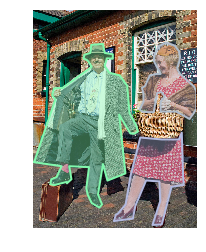

In [4]:
idx = 20
test_imgIds = seg_train.getImgIds(imgIds = imgIds[idx])
img = seg_train.loadImgs(test_imgIds[np.random.randint(0,len(test_imgIds))])[0]
test_img = skimage.io.imread(dataset_root+'train2017/'+img['file_name'])

plt.imshow(test_img); plt.axis('off')
annIds = seg_train.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = seg_train.loadAnns(annIds)
seg_train.showAnns(anns)

In [5]:
is_crowd=False

not_crowd_img = []
not_crowd_mask = []
with tqdm(total=len(img_list)) as pbar:
    pbar.set_description('[ Extract Images and Mask ]')
    for img_idx in range(len(img_list)):
        annIds = seg_train.getAnnIds(imgIds=img_list[img_idx]['id'], catIds=catIds, iscrowd=None)
        anns = seg_train.loadAnns(annIds)
        if is_crowd and len(anns)==1 : 
            not_crowd_mask.append(seg_train.annToMask(anns[0]))
            not_crowd_img.append(skimage.io.imread(dataset_root+'train2017/'+img_list[img_idx]['file_name']))
        elif not is_crowd :
            ########################################################
            # Need To Implement Crowd Masking Considering Instance #
            ########################################################
            not_crowd_mask.append(seg_train.annToMask(anns[0]))
            not_crowd_img.append(skimage.io.imread(dataset_root+'train2017/'+img_list[img_idx]['file_name']))
        else : pass
        pbar.update(1)

[ Extract Images and Mask ]: 100%|██████████| 64115/64115 [05:33<00:00, 192.05it/s]


## Key Point & Bounding Box

(-0.5, 228.5, 319.5, -0.5)

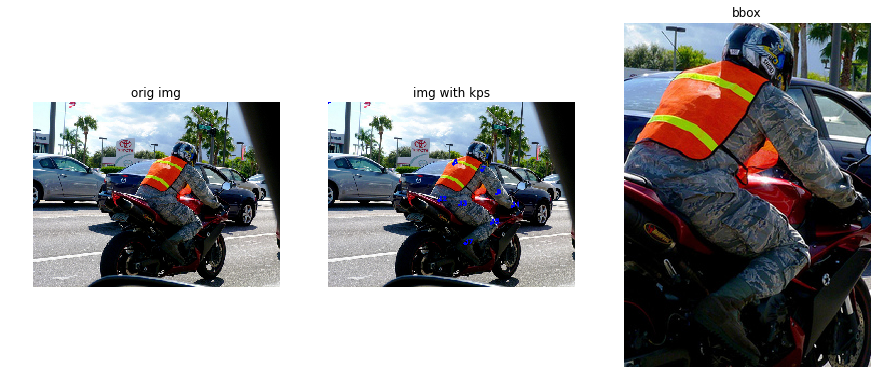

In [6]:
idx=0
fig, plot = plt.subplots(1,3)
fig.set_size_inches(15,10)

test_img=skimage.io.imread(dataset_root+'train2017/'+'0'*6+str(kps_train['annotations'][idx]['image_id'])+'.jpg')
test_coor=np.array(kps_train['annotations'][idx]['keypoints']).reshape(-1,3)[:,:2]
bbox = list(map(int,kps_train['annotations'][idx]['bbox']))

plot[0].imshow(test_img); plot[0].set_title('orig img'); plot[0].axis('off')
plot[1].imshow(tools.etc.markJoints(test_img.copy(),test_coor)); plot[1].set_title('img with kps'); plot[1].axis('off')
plot[2].imshow(test_img[bbox[1]:bbox[1]+bbox[3],bbox[0]:bbox[0]+bbox[2]]); plot[2].set_title('bbox'); plot[2].axis('off')